In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if str(os.getcwdb()[-3:]).split("'")[1] != 'src':
    for _ in range(2):
        os.chdir(os.path.dirname(os.getcwdb()))


# Consideraciones

- En este "notebook" se trabajan los "dataframes" que relacionan cada imagen con sus características con tal de obtener un único "dataframe" que contenga los datos necesarios para que, una vez identificada la imagen introducida para la predicción mediante "deep learning", el otro modelo, entrenado con el "dataframe" original de precios, sea capaz de predecir el precio

- Las imágenes y sus datos se obtienen aquí: https://www.kaggle.com/datasets/harshitlakhani/natural-diamonds-prices-images


# Unión

- Como es más cómodo trabajar con un único "dataframe", se fusionan todos los de los diamantes por características 


In [36]:
df_cushion = pd.read_csv(r'data\raw\images_data\data_cushion.csv')
df_emerald = pd.read_csv(r'data\raw\images_data\data_emerald.csv')
df_heart = pd.read_csv(r'data\raw\images_data\data_heart.csv')
df_marquise = pd.read_csv(r'data\raw\images_data\data_marquise.csv')
df_oval = pd.read_csv(r'data\raw\images_data\data_oval.csv')
df_pear = pd.read_csv(r'data\raw\images_data\data_pear.csv')
df_princess = pd.read_csv(r'data\raw\images_data\data_princess.csv')
df_round = pd.read_csv(r'data\raw\images_data\data_round.csv')

df_diamonds = pd.read_csv(r'data\processed\competition\train_processed.csv')


In [37]:
df_cushion.head()


,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1638147,CUSHION,0.55,SI2,E,EX,EX,VG,N,5.05-4.35×2.94,"1,378.65"
1,1630155,CUSHION,0.50,VVS1,FANCY,EX,EX,VG,F,4.60-4.31×2.92,"1,379.74"
2,1612606,CUSHION,0.51,VS2,H,EX,EX,VG,N,4.71-4.35×2.94,"1,380.19"
3,1638140,CUSHION,0.50,VS2,H,EX,EX,VG,N,4.91-4.26×2.88,"1,380.61"
4,1536093,CUSHION,0.53,SI1,D,EX,VG,VG,N,4.70-4.46×3.01,"1,383.13"


In [38]:
dataframes_characteristics_list = [df_cushion, 
                                   df_emerald,
                                   df_heart,
                                   df_marquise,
                                   df_oval,
                                   df_pear,
                                   df_princess,
                                   df_round
                                   ]

df_characteristics = pd.concat(dataframes_characteristics_list)

df_characteristics.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6339 entries, 0 to 2055
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            6339 non-null   object 
 1   Shape         6339 non-null   object 
 2   Weight        6339 non-null   float64
 3   Clarity       6319 non-null   object 
 4   Colour        6339 non-null   object 
 5   Cut           6337 non-null   object 
 6   Polish        6338 non-null   object 
 7   Symmetry      6332 non-null   object 
 8   Fluorescence  6337 non-null   object 
 9   Messurements  6339 non-null   object 
 10  Price         6339 non-null   object 
dtypes: float64(1), object(10)
memory usage: 594.3+ KB


# Adaptación

- Se adapta el "dataframe" resultante para que sea idéntico al que se tiene que pasar al modelo de predicción de precios para su entreno

In [39]:
# Este es el "dataframe" original en el que hay que fijarse
df_diamonds.head()


,id,weight (carat),cut quality,color quality,clarity quality,depth (percentage),table (percentage),length (millimeters),width (millimeters),depth (millimeters),price
0,0,0.30,3.0,6.0,1.0,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,4.0,5.0,5.0,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,4.0,4.0,3.0,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,2.0,3.0,1.0,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,3.0,3.0,4.0,62.3,59.0,4.50,4.55,2.82,6.588


## Índice

In [40]:
df_characteristics = df_characteristics.set_index('Id')

df_characteristics.head()


,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
Id,,,,,,,,,,
1638147,CUSHION,0.55,SI2,E,EX,EX,VG,N,5.05-4.35×2.94,"1,378.65"
1630155,CUSHION,0.50,VVS1,FANCY,EX,EX,VG,F,4.60-4.31×2.92,"1,379.74"
1612606,CUSHION,0.51,VS2,H,EX,EX,VG,N,4.71-4.35×2.94,"1,380.19"
1638140,CUSHION,0.50,VS2,H,EX,EX,VG,N,4.91-4.26×2.88,"1,380.61"
1536093,CUSHION,0.53,SI1,D,EX,VG,VG,N,4.70-4.46×3.01,"1,383.13"


## Borrado de columnas

- Ya existe una columna de precios, pero se borra para usar el otro modelo con tal de predecirlo, a partir de la imagen que se introduzca, con mayor exactitud, ya que el otro modelo se entrena con datos que este primero no ve y tiene ocho veces los diamantes que constan en este. Tratar de predecir el precio directamente de la imagen podría dar lugar a un mayor margen de error

- Se ha visto en "Unión" que hay nulos, además de columnas que no sirven. No queda más remedio que hacer un descarte

In [41]:
df_characteristics = df_characteristics.drop(columns=['Polish', 'Symmetry', 'Fluorescence', 'Shape'])

df_characteristics.head()


,Weight,Clarity,Colour,Cut,Messurements,Price
Id,,,,,,
1638147,0.55,SI2,E,EX,5.05-4.35×2.94,"1,378.65"
1630155,0.50,VVS1,FANCY,EX,4.60-4.31×2.92,"1,379.74"
1612606,0.51,VS2,H,EX,4.71-4.35×2.94,"1,380.19"
1638140,0.50,VS2,H,EX,4.91-4.26×2.88,"1,380.61"
1536093,0.53,SI1,D,EX,4.70-4.46×3.01,"1,383.13"


In [42]:
df_characteristics = df_characteristics.dropna()

df_characteristics.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6317 entries, 1638147 to 1630512
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weight        6317 non-null   float64
 1   Clarity       6317 non-null   object 
 2   Colour        6317 non-null   object 
 3   Cut           6317 non-null   object 
 4   Messurements  6317 non-null   object 
 5   Price         6317 non-null   object 
dtypes: float64(1), object(5)
memory usage: 345.5+ KB


## Columna "Cut"

- Se pasa la columna a números

- No hay el equivalente a "Premium" del "dataframe" de predicción de precios, así que se ignora ese número

In [43]:
df_characteristics['Cut'].unique()


array(['EX', 'VG', 'GD', 'F'], dtype=object)

In [44]:
df_characteristics.loc[:, 'Cut'] = df_characteristics['Cut'].apply(lambda x: 0 if x == 'F' 
                                                                    else 1 if x == 'GD'
                                                                    else 2 if x == 'VG'
                                                                    else 4
                                                                    )
df_characteristics.loc[:, 'Cut'] = df_characteristics['Cut'].astype(float)

df_characteristics['Cut'].unique()

C:\Users\Roger\AppData\Local\Temp\ipykernel_5404\1055745526.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_characteristics.loc[:, 'Cut'] = df_characteristics['Cut'].apply(lambda x: 0 if x == 'F'
C:\Users\Roger\AppData\Local\Temp\ipykernel_5404\1055745526.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_characteristics.loc[:, 'Cut'] = df_characteristics['Cut'].astype(float)


array([4., 2., 1., 0.])

## Columna "Colour"

- Hay muchas más posibilidades de color que en el "dataframe" de precios, así que se atribuyen a valores nuevos (fuente: https://www.americangemsociety.org/understanding-diamond-color-the-4cs-of-diamonds/)

- El color "FANCY" se elimina por ser muy difícil de categorizar. Estaría por debajo de "Z" por ser más colorido, pero dicha coloración se consideraría como algo positivo, por lo que su valoración sería mejor que la que le correspondería en realidad

In [45]:
df_characteristics['Colour'].unique()


array(['E', 'FANCY', 'H', 'D', 'I', 'M', 'K', 'W-X', 'Y-Z', 'N', 'J', 'F',
       'L', 'G', 'O-P', 'S-T', 'U-V', 'W', 'Q-R', 'O'], dtype=object)

In [46]:
df_characteristics = df_characteristics.drop(df_characteristics[df_characteristics['Colour'] == 'FANCY'].index)

df_characteristics['Colour'].unique()


array(['E', 'H', 'D', 'I', 'M', 'K', 'W-X', 'Y-Z', 'N', 'J', 'F', 'L',
       'G', 'O-P', 'S-T', 'U-V', 'W', 'Q-R', 'O'], dtype=object)

In [47]:
df_characteristics.loc[:, 'Colour'] = df_characteristics['Colour'].apply(lambda x: -12 if x == 'Y-Z'
                                                                            else -11 if x == 'W-X'
                                                                            else -10 if x == 'W'
                                                                            else -9 if x == 'U-V'
                                                                            else -8 if x == 'S-T'
                                                                            else -7 if x == 'Q-R'
                                                                            else -6 if x == 'O-P'
                                                                            else -5 if x == 'O'
                                                                            else -4 if x == 'N'
                                                                            else -3 if x == 'M'
                                                                            else -2 if x == 'L'
                                                                            else -1 if x == 'K'
                                                                            else 0 if x == 'J'
                                                                            else 1 if x == 'I' 
                                                                            else 2 if x == 'H' 
                                                                            else 3 if x == 'G'
                                                                            else 4 if x == 'F'
                                                                            else 5 if x == 'E'
                                                                            else 6
                                                                            )
df_characteristics.loc[:, 'Colour'] = df_characteristics['Colour'].astype(float)

df_characteristics['Colour'].unique()


C:\Users\Roger\AppData\Local\Temp\ipykernel_5404\4138186483.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_characteristics.loc[:, 'Colour'] = df_characteristics['Colour'].apply(lambda x: -12 if x == 'Y-Z'
C:\Users\Roger\AppData\Local\Temp\ipykernel_5404\4138186483.py:21: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_characteristics.loc[:, 'Colour'] = df_characteristics['Colour'].astype(float)


array([  5.,   2.,   6.,   1.,  -3.,  -1., -11., -12.,  -4.,   0.,   4.,
        -2.,   3.,  -6.,  -8.,  -9., -10.,  -7.,  -5.])

## Columna "Clarity"

- No existe la claridad "FL" ("flawless") en el "dataframe" de precios, así que se le asigna un punto de más (8)

In [48]:
df_characteristics['Clarity'].unique()


array(['SI2', 'VS2', 'SI1', 'VVS1', 'VVS2', 'VS1', 'I1', 'IF', 'FL'],
      dtype=object)

In [49]:
df_characteristics.loc[:, 'Clarity'] = df_characteristics['Clarity'].apply(lambda x: 0 if x == 'I1'
                                                                            else 1 if x == 'SI2'
                                                                            else 2 if x == 'SI1'
                                                                            else 3 if x == 'VS2'
                                                                            else 4 if x == 'VS1'
                                                                            else 5 if x == 'VVS2'
                                                                            else 6 if x == 'VVS1'
                                                                            else 7 if x == 'IF'
                                                                            else 8
                                                                            )
df_characteristics.loc[:, 'Clarity'] = df_characteristics['Clarity'].astype(float)

df_characteristics['Clarity'].unique()


C:\Users\Roger\AppData\Local\Temp\ipykernel_5404\616649095.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_characteristics.loc[:, 'Clarity'] = df_characteristics['Clarity'].apply(lambda x: 0 if x == 'I1'
C:\Users\Roger\AppData\Local\Temp\ipykernel_5404\616649095.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_characteristics.loc[:, 'Clarity'] = df_characteristics['Clarity'].astype(float)


array([1., 3., 2., 6., 5., 4., 0., 7., 8.])

## Columna "Messurements"

- Hay que dividirla en las 3 correspondientes del "dataframe" de precios

- Con los datos resultantes, hay que calcular la columna de "depth (percentage)" mediante la operación aprendida en el EDA

In [50]:
df_characteristics['Messurements'].unique()


array(['5.05-4.35×2.94', '4.71-4.35×2.94', '4.91-4.26×2.88', ...,
       '5.00-5.04×3.18', '4.93-4.96×3.19', '5.09-5.13×3.12'], dtype=object)

In [51]:
df_characteristics['length (millimeters)'] =  df_characteristics['Messurements'].str.extract('^([0-9]?.?[0-9]+)')

df_characteristics['length (millimeters)'].unique()


array(['5.05', '4.71', '4.91', '4.70', '4.76', '5.16', '4.48', '4.55',
       '4.89', '4.69', '4.78', '6.09', '4.64', '4.63', '5.73', '4.53',
       '6.51', '5.23', '5.09', '5.13', '4.67', '5.47', '4.62', '5.19',
       '5.01', '4.57', '5.70', '4.96', '5.87', '5.28', '5.34', '4.49',
       '4.77', '4.95', '4.66', '3.95', '4.74', '4.25', '5.59', '4.97',
       '4.98', '5.29', '5.00', '4.59', '4.44', '4.93', '5.80', '5.62',
       '4.60', '5.91', '5.31', '6.12', '5.04', '4.92', '4.84', '5.18',
       '4.73', '4.94', '4.56', '4.99', '4.86', '4.38', '4.51', '4.72',
       '4.82', '5.02', '5.42', '4.61', '5.03', '5.06', '5.08', '4.52',
       '4.43', '4.58', '5.25', '6.27', '5.35', '5.55', '4.87', '5.20',
       '4.47', '5.48', '4.88', '5.26', '4.75', '5.84', '5.17', '5.24',
       '5.32', '5.45', '5.21', '5.10', '6.43', '5.22', '5.44', '4.81',
       '5.61', '4.68', '5.53', '4.45', '4.39', '5.64', '6.07', '5.12',
       '6.24', '5.52', '4.90', '5.15', '4.50', '4.65', '5.54', '6.28',
      

In [52]:
df_characteristics['width (millimeters)'] =  df_characteristics['Messurements'].str.extract('[\sX\-]+([0-9]?.?[0-9]+)[\sxX×]+')

df_characteristics['width (millimeters)'].unique()


array(['4.35', '4.26', '4.46', '4.42', '4.21', '4.17', '4.38', '4.50',
       '4.24', '4.52', '5.11', '4.48', '4.33', '4.71', '4.43', '5.31',
       '4.47', '5.20', '4.87', '4.12', '4.28', '4.97', '4.40', '4.45',
       '4.29', '4.20', '4.78', '5.18', '4.81', '4.27', '4.32', '4.34',
       '4.00', '3.89', '4.57', '3.98', '3.78', '4.75', '4.06', '4.60',
       '4.85', '4.41', '4.53', '4.25', '4.94', '4.64', '4.16', '4.13',
       '5.27', '4.37', '4.49', '5.05', '4.83', '4.90', '4.82', '4.31',
       '4.39', '4.19', '4.23', '3.85', '4.72', '4.51', '5.08', '5.43',
       '4.22', '5.01', '4.79', '4.70', '4.44', '4.09', '5.00', '5.35',
       '5.19', '4.36', '5.55', '4.86', '5.30', '5.23', '5.07', '4.18',
       '5.42', '4.89', '5.39', '4.95', '5.17', '4.62', '4.14', '4.84',
       '4.67', '4.30', '4.73', '4.80', '4.58', '5.12', '5.02', '5.15',
       '5.09', '5.03', '5.04', '5.06', '4.96', '5.21', '4.54', '4.98',
       '3.92', '3.84', '3.97', '4.99', '5.50', '4.11', '4.55', '5.67',
      

In [53]:
df_characteristics['depth (millimeters)'] =  df_characteristics['Messurements'].str.extract('[\sX\-]+[0-9]?.?[0-9]+[\sxX×]+([0-9]?.?[0-9]+)')

df_characteristics['depth (millimeters)'].unique()


array(['2.94', '2.88', '3.01', '2.99', '2.85', '2.90', '3.04', '3.02',
       '2.84', '2.83', '3.47', '3.03', '2.92', '3.20', '3.00', '3.27',
       '3.53', '3.29', '2.78', '3.38', '2.79', '3.23', '2.87', '3.61',
       '3.26', '2.86', '2.68', '2.64', '3.10', '2.53', '3.22', '2.74',
       '3.11', '2.97', '3.06', '3.45', '3.15', '2.98', '2.80', '3.56',
       '3.52', '3.34', '3.37', '2.81', '2.95', '2.89', '3.05', '2.72',
       '3.19', '2.93', '3.09', '3.42', '3.07', '2.96', '3.63', '2.82',
       '3.25', '2.73', '3.30', '3.39', '3.64', '3.75', '3.50', '3.76',
       '3.43', '3.85', '3.33', '3.51', '3.28', '3.13', '3.59', '3.60',
       '3.66', '3.57', '3.12', '2.91', '3.24', '3.40', '3.46', '3.48',
       '3.14', '3.41', '3.68', '3.31', '3.08', '2.76', '2.56', '3.69',
       '3.32', '3.21', '3.74', '3.58', '3.44', '4.01', '3.97', '3.49',
       '3.83', '3.17', '3.35', '3.55', '3.18', '3.62', '3.78', '3.16',
       '3.91', '3.54', '3.71', '3.77', '3.36', '3.70', '3.93', '3.67',
      

In [54]:
df_characteristics = df_characteristics.drop(columns='Messurements')

df_characteristics.head()


,Weight,Clarity,Colour,Cut,Price,length (millimeters),width (millimeters),depth (millimeters)
Id,,,,,,,,
1638147,0.55,1.0,5.0,4.0,"1,378.65",5.05,4.35,2.94
1612606,0.51,3.0,2.0,4.0,"1,380.19",4.71,4.35,2.94
1638140,0.50,3.0,2.0,4.0,"1,380.61",4.91,4.26,2.88
1536093,0.53,2.0,6.0,4.0,"1,383.13",4.70,4.46,3.01
1643527,0.52,6.0,1.0,4.0,"1,384.24",4.76,4.42,2.99


In [55]:
df_characteristics['Price'] = df_characteristics['Price'].apply(lambda x: x.replace(',', ''))

df_characteristics = df_characteristics.apply(pd.to_numeric)

df_characteristics['depth (percentage)'] = (df_characteristics['depth (millimeters)'] / ((df_characteristics['length (millimeters)'] + df_characteristics['width (millimeters)']) / 2)) * 100

df_characteristics['depth (percentage)'].unique()


array([62.55319149, 64.90066225, 62.81352236, ..., 59.90338164,
       63.07189542, 63.34661355])

## Nuevos nombres

In [56]:
df_characteristics = df_characteristics.rename(columns={'Weight': 'weight (carat)',
                                                        'Cut': 'cut quality',
                                                        'Colour': 'color quality',
                                                        'Clarity': 'clarity quality',
                                                        'Price': 'price'
                                                        }
                                                )

df_characteristics.head()


,weight (carat),clarity quality,color quality,cut quality,price,length (millimeters),width (millimeters),depth (millimeters),depth (percentage)
Id,,,,,,,,,
1638147,0.55,1.0,5.0,4.0,1378.65,5.05,4.35,2.94,62.553191
1612606,0.51,3.0,2.0,4.0,1380.19,4.71,4.35,2.94,64.900662
1638140,0.50,3.0,2.0,4.0,1380.61,4.91,4.26,2.88,62.813522
1536093,0.53,2.0,6.0,4.0,1383.13,4.70,4.46,3.01,65.720524
1643527,0.52,6.0,1.0,4.0,1384.24,4.76,4.42,2.99,65.141612


## Cambio de orden

In [57]:
df_characteristics = df_characteristics[['weight (carat)', 'cut quality', 'color quality', 'clarity quality', 'depth (percentage)', 'length (millimeters)', 'width (millimeters)', 'depth (millimeters)', 'price']]

df_characteristics.head()


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),length (millimeters),width (millimeters),depth (millimeters),price
Id,,,,,,,,,
1638147,0.55,4.0,5.0,1.0,62.553191,5.05,4.35,2.94,1378.65
1612606,0.51,4.0,2.0,3.0,64.900662,4.71,4.35,2.94,1380.19
1638140,0.50,4.0,2.0,3.0,62.813522,4.91,4.26,2.88,1380.61
1536093,0.53,4.0,6.0,2.0,65.720524,4.70,4.46,3.01,1383.13
1643527,0.52,4.0,1.0,6.0,65.141612,4.76,4.42,2.99,1384.24


## Eliminación de duplicados

In [58]:
df_characteristics = df_characteristics.drop_duplicates()


## Comprobaciones

- A diferencia del "dataframe" visto en el EDA, no hay valores extraños en las variables relacionadas con el tamaño

- Las correlaciones varían un poco también respecto ese "dataframe", pero la tendencia general es la misma

In [59]:
df_characteristics.describe()


,weight (carat),cut quality,color quality,clarity quality,depth (percentage),length (millimeters),width (millimeters),depth (millimeters),price
count,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000,5730.000000
mean,0.612188,3.387260,2.515183,3.075393,60.768333,5.422977,4.765220,3.072616,2378.561935
std,0.348213,1.014614,2.953269,1.545235,7.331044,1.199660,0.735537,0.499575,3646.973640
min,0.180000,0.000000,-12.000000,0.000000,35.164835,3.540000,3.010000,1.880000,683.220000
25%,0.410000,2.000000,1.000000,2.000000,56.661696,4.680000,4.330000,2.730000,1276.140000
50%,0.500000,4.000000,3.000000,3.000000,62.340549,5.110000,4.840000,3.110000,1856.715000
75%,0.710000,4.000000,5.000000,4.000000,65.368808,5.870000,5.160000,3.320000,2214.525000
max,5.010000,4.000000,6.000000,8.000000,78.729548,12.000000,9.720000,6.350000,76147.680000


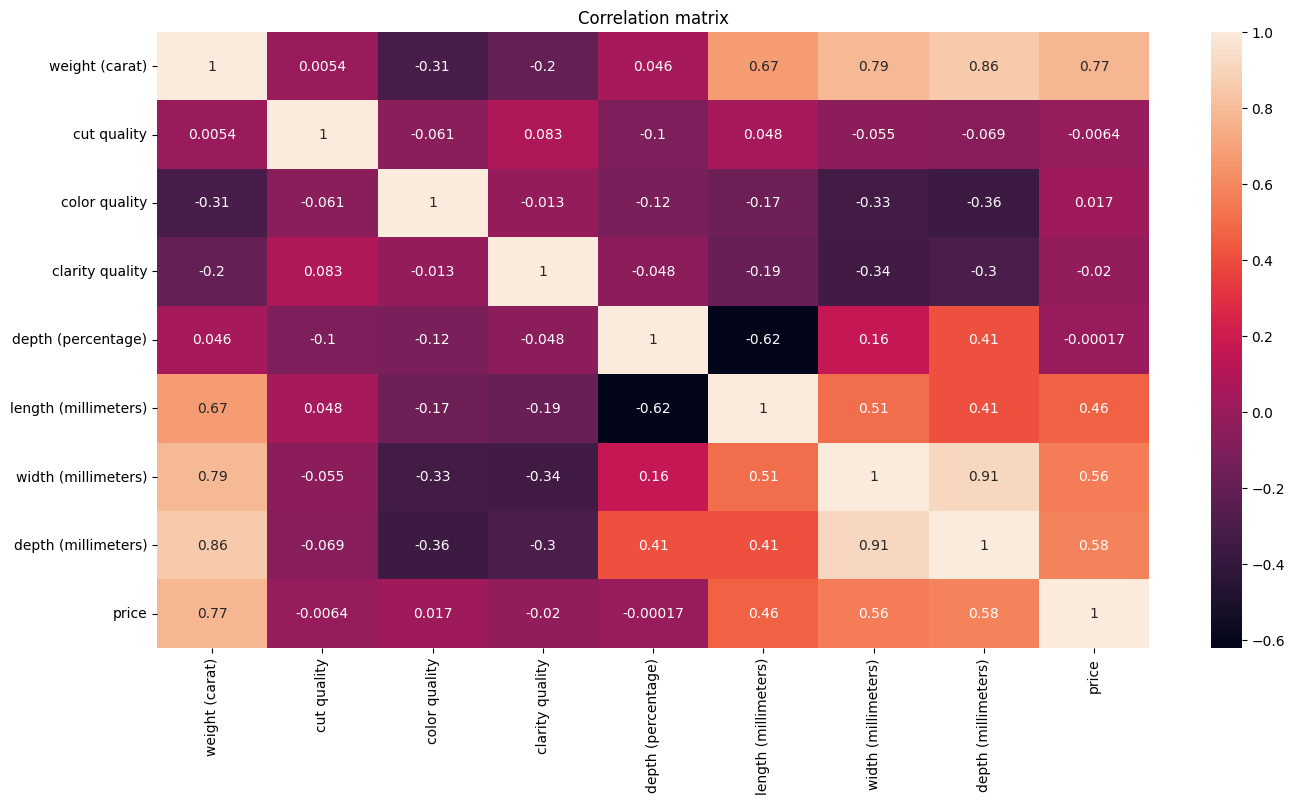

In [60]:
plt.rc("figure", figsize=(16, 8))

corr = df_characteristics.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix')
plt.show()


# Exportación

- Se guarda el nuevo "dataframe" como "csv" listo para el modelaje

- Como no hay columna "table (percentage)", no queda más remedio que conseguir un modelo de predicción de precios al que no se le tenga que pasar esa variable. Se hace en el "notebook" llamado "model_optimization_price"

In [61]:
df_characteristics.to_csv(r'data\processed\images_data_processed.csv', index='Id')
